## Indeed It Is Time To Search My Data Scientist Dream Job!

It has been a challenging but rewarding four months learning to become a data scientist at General Assembly. 

During the course, I have learned how to use Jupyter Notebook as you can see. I also learn how to program with Python and it's many associated libraries such as Pandas for data mugging, Matploylib for visualization, BeautifulSoup for web-scrapping, Skit-learn for machine learning, natural language processing, and statistical concepts and modeling to name a few. 

It is time to apply my proudly acquired skills for good use. First and formost, I need to find out the data scientist job market and the salary ranges so that I can start my dream job search. 


In [1]:
# First import all the necessary libraries for webscrapping & pandas to store
# resutls into a dataframe
from bs4 import BeautifulSoup
import requests
import urllib
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (8, 4)})
import re
import numpy as np
fig, ax = plt.subplots(figsize = (11, 7))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# First, take a look at the sample indeed data scientist job search result in Atlanta, GA. 

url = 'https://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=Atlanta%2C+GA'
response = requests.get(url)
html_doc = response.text

# Check the first 500 words to see how it looks like
html_doc[:500]



u'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="content-type" content="text/html;charset=UTF-8">\n<!-- pll --><script type="text/javascript" src="/s/78e6e0e/en_US.js"></script>\n<link href="/s/97410d0/jobsearch_all.css" rel="stylesheet" type="text/css">\n<link rel="alternate" type="application/rss+xml" title="Data Scientist $20,000 Jobs, Employment in Atlanta, GA" href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&l=Atlanta%2C+GA">\n<link rel="alternate" media="only screen and (m'

In [3]:
# make the soup

soup = BeautifulSoup(html_doc, 'lxml')

# prettify the soup
pretty_soup = soup.prettify()

# find the job results that I can get the job information
print pretty_soup[60000:70000]

# From the <div class "row result", I can get all the information that I need from a div class row result


ailed": false, "requestPending": false, "notesEnabled": false, "currentPage" : "serp", "sponsored" : true,"showSponsor" : true,"reportJobButtonEnabled": false, "showMyJobsHired": false, "showSaveForSponsored": true, "showJobAge": true};
             </script>
            </div>
           </div>
           <div class="tab-container">
            <div class="sign-in-container result-tab">
            </div>
            <div class="tellafriend-container result-tab email_job_content">
            </div>
           </div>
          </div>
         </div>
         <div class="row result" data-jk="33df908c84ec9b37" id="pj_33df908c84ec9b37">
          <!-- Previously this variable was used to indicate job board jobs, we have replaced that with a more accurate source type check -->
          <a class="jobtitle turnstileLink" data-tn-element="jobTitle" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0C-lKLKzDq4wNH2YuCldOsM1_n6las3t_E4n-3ttZWpzX7m5tOkZK9LdW5rDQ80YZ42vTmeGQYZSmdd6H1AQS-lEv8Ulk_DG7JRgXj5ym

In [4]:
# Setup an empty dataframe contains the features that I am interested in getting from indeed.com
jobpost = pd.DataFrame(columns = ['city', 'location', 'jobtitle', 'company', 'salary', 'job_desc'])

In [6]:
# I spread out the cities in the North East, South, South East, West for the job market outlook
# and scrape indeed using BeutifulSoup. 

# After 2 weeks trials and errors, I finally came up with a clearner code to scrap the information
# for analysis

max_results_per_city = 500

cities = ['New+York', 'Chicago', 'Baltimore', 'Philadelphia','Boston', 'Pittsburgh',
          'San+Francisco', 'Los+Angeles', 'San+Diego', 'Denver', 'Salt+Lake+City', 
          'Phoenix', 'Tucson', 'Austin', 'Dallas', 'Houston', 'San+Antonio', 'Albuquerque',
          'Atlanta','Miami', 'Raleigh', 'Nashville', 'Charlotte', 'Birmingham', 'New+Orleans']


for city in cities:
    for page in range(0, max_results_per_city, 10):
        page = requests.get("http://www.indeed.com/jobs?q=data+scientist+%2430%2C000&l={}&start={}".format(city, page))
        time.sleep(1)
        soup = BeautifulSoup(page.content, 'lxml')
        for entry in soup.find_all('div', {'class': 'row'}):
            location = entry.find('span', {'class': 'location'}).text
            jobtitle = entry.find('a', {'data-tn-element': 'jobTitle'}).text
            company = entry.find('span', {'class': 'company'}).text.strip().replace('\n', '')
            salary = entry.find('span', {'class': 'no-wrap'})
            job_desc = entry.find('span', {'class': 'summary'}).text.replace('\n', '')   
            jobpost.loc[len(jobpost)]= [city, location, jobtitle, company, salary, job_desc] 

In [7]:
# Check how many jobpost being scrapped.

jobpost.shape

# It shows around eighteen thousand. Good!

(31856, 6)

In [8]:
# Take a peek at the scrapped job posts 

jobpost.head(10)

# There are a lot of jobs do not have salary information. 

,city,location,jobtitle,company,salary,job_desc
0,New+York,"New York, NY 10154",Healthcare & Life Sciences - Data Scientist,KPMG,None,KPMG is currently seeking a Healthcare & Life ...
1,New+York,New York State,Data Scientist/Statistician (Statistical Model...,"Quintrix Solutions, Inc",None,The starting salary for the Data Scientist pos...
2,New+York,"New York, NY",Lead Data Scientist - Major financial Services...,Starbridge Partners (On behalf of Client),None,Chief Data Scientist. Drive the collection of ...
3,New+York,"New York, NY 10019 (Midtown area)",Junior Data Scientist/Data Scientist,Penguin Random House,None,The Data Science & Analytics group at Penguin ...
4,New+York,"New York, NY 10001 (Chelsea area)",Machine Learning Engineer (Associate) - Intell...,JP Morgan Chase,None,JP Morgan Intelligent Solutions (JPMIS) is a n...
5,New+York,"New York, NY 10022 (Midtown area)",Data Science - USA,First Derivatives,None,Data Scientists explore vast amounts of inform...
6,New+York,"New York, NY 10032 (Washington Heights area)",Data Science Developer,Morgan Stanley,None,As a data scientist developer your role will b...
7,New+York,"New York, NY","Quantitative Analysis, Full Time Analyst (Nort...",Citi,None,You're the brains behind our work. You’re read...
8,New+York,"New York, NY","Data Scientist, Forecast Analyst",NBCUniversal,None,Experience with data visualization techniques ...
9,New+York,"Armonk, NY",Data Scientist/Analyst,IBM,None,Basic understanding of Big Data ecosystem and ...


In [9]:
# Save it to .csv file

jobpost.to_csv("scrapped_jobpost_7_29", encoding = 'utf-8', index = False)


In [10]:
# Retrive the jobpost

job_result = pd.read_csv('../project-four/scrapped_jobpost_7_29', encoding = 'utf-8')
                        

In [11]:
# Check how many posts were srapped from all the cities I chose
job_result.shape

# There are 31856 rows of data and 6 features I am interested in. 

(31856, 6)

In [12]:
# Check the jobs that only have salary included. For some reason, the <span class="no-wrap"> also scrapped. 
# No problem, this can be removed. 

job_result.sort_values(['salary']).head(3)

,city,location,jobtitle,company,salary,job_desc
18524,San+Francisco,"San Francisco, CA 94158 (South Of Market area)",Video Machine Learning - field position/yard l...,WingWarp Inc.,"<span class=""no-wrap"">$10,000 a month</span>",We would like to process real time video of a ...
16801,Boston,"Cambridge, MA",Software Developer III,Nextgen Technologies,"<span class=""no-wrap"">$100 an hour</span>",The candidate will be working with a team of d...
3203,Boston,"Cambridge, MA",Software Developer III,Nextgen Technologies,"<span class=""no-wrap"">$100 an hour</span>",The candidate will be working with a team of d...


In [13]:
# check result column data types

job_result.info()

# all the columns have data type string. We need to slice & dice the salary column to get the min & max 
# salary to calculate the median salary. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31856 entries, 0 to 31855
Data columns (total 6 columns):
city        31856 non-null object
location    31856 non-null object
jobtitle    31856 non-null object
company     31856 non-null object
salary      2304 non-null object
job_desc    31856 non-null object
dtypes: object(6)
memory usage: 1.5+ MB


In [14]:
job_result.isnull().sum()

# as expected, salary column has a lot of missing value from the salary column. 
# We will use the existing salary data to make the predictions of the jobs that have missing salalary data. 

city            0
location        0
jobtitle        0
company         0
salary      29552
job_desc        0
dtype: int64

In [15]:
job_result.salary.value_counts(dropna=False).head(10)


# Not all the salary are yearly salary. Some are monthly, some are hourly. Interesting.
# This means we need to standardize the salary.
# For some reason, when I scrapped the site, it won't allow me to get the text out of the
# span class = 'no-wrap' tag. No problem, we will just need to do some clean up. 

NaN                                                      29552
<span class="no-wrap">$31,125 - $42,843 a year</span>      180
<span class="no-wrap">$24.27 an hour</span>                173
<span class="no-wrap">$52,550 - $68,318 a year</span>       96
<span class="no-wrap">$38,200 - $53,000 a year</span>       90
<span class="no-wrap">$45,000 - $77,000 a year</span>       84
<span class="no-wrap">$25.41 an hour</span>                 73
<span class="no-wrap">$6,250 - $10,833 a month</span>       69
<span class="no-wrap">$120,000 a year</span>                67
<span class="no-wrap">$65,000 - $75,000 a year</span>       66
Name: salary, dtype: int64

In [16]:
# Replace/remove no-wrap stuff

job_result['salary'] = job_result.salary.str.replace('<span class="no-wrap">', '')
job_result['salary'] = job_result.salary.str.replace('</span>', '')
job_result['salary'] = job_result.salary.str.replace('$', '')
job_result['salary'] = job_result.salary.str.replace(',', '')

                                                

In [17]:
job_result.sort_values(['salary']).head(3)
# All the no-wrap stuff, $ sign, and , are removed. 

,city,location,jobtitle,company,salary,job_desc
16801,Boston,"Cambridge, MA",Software Developer III,Nextgen Technologies,100 an hour,The candidate will be working with a team of d...
3203,Boston,"Cambridge, MA",Software Developer III,Nextgen Technologies,100 an hour,The candidate will be working with a team of d...
3187,Boston,"Cambridge, MA",Software Developer III,Nextgen Technologies,100 an hour,The candidate will be working with a team of d...


In [18]:
# The salary usually comes in ranges. Let's treat the lower range as miniumn salary and higher range as maximum salary.
# split the salary columns so that we can slide out min & max salary

job_result['split_salary'] = job_result.salary.str.split()

In [19]:
# after splitting, slice out minimum offered salary
job_result['min_salary'] = job_result.split_salary.str.get(0)

In [20]:
# convert the salary to float
job_result['min_salary']=pd.to_numeric(job_result['min_salary'], errors='coerce')

In [21]:
# get the maxium salary
job_result['max_salary'] = job_result.split_salary.str.get(2)

In [22]:
# convert maximum salary to float
job_result['max_salary']=pd.to_numeric(job_result['max_salary'], errors='coerce')

In [23]:
job_result.info()

# Both the min & max salary now are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31856 entries, 0 to 31855
Data columns (total 9 columns):
city            31856 non-null object
location        31856 non-null object
jobtitle        31856 non-null object
company         31856 non-null object
salary          2304 non-null object
job_desc        31856 non-null object
split_salary    2304 non-null object
min_salary      2304 non-null float64
max_salary      1604 non-null float64
dtypes: float64(2), object(7)
memory usage: 2.2+ MB


In [24]:
# Check mininum salary value to see if they are being sliced out correctly
job_result.sort_values(['max_salary'], ascending=True)[60:80]

# This looks pretty good. We do need to fix those that are hourly & monthly wages.
# I have noticed hourly wages usually below $150. and monthly will be around $1000 - $11000.
# A for loop to convert these numbers to yearly salary should do it. 


,city,location,jobtitle,company,salary,job_desc,split_salary,min_salary,max_salary
16663,Boston,"Boston, MA",Remote Healthcare Data Scientist - Consultant,Placements USA LLC,55 - 60 an hour,Data Scientist (1099 Consultant) Work remotely...,"[55, -, 60, an, hour]",55.0,60.0
2252,Philadelphia,"Philadelphia, PA",Data Scientist - PowerPoint,"Computer Enterprises, Inc. (CEI)",60 - 65 an hour,Computer Enterprises has an opening for a Data...,"[60, -, 65, an, hour]",60.0,65.0
15850,Philadelphia,"Philadelphia, PA",Data Scientist - PowerPoint,"Computer Enterprises, Inc. (CEI)",60 - 65 an hour,Computer Enterprises has an opening for a Data...,"[60, -, 65, an, hour]",60.0,65.0
28463,Raleigh,"Morrisville, NC 27560",Statistical Programmer,Piper Companies,55 - 65 an hour,"Creation of macro programs, perform data check...","[55, -, 65, an, hour]",55.0,65.0
18267,San+Francisco,"Redwood, CA",Data Scientist,Cloud Big Data Technologies,65 - 66 an hour,6+ years of experience in Data. Knowledge of v...,"[65, -, 66, an, hour]",65.0,66.0
4674,San+Francisco,"Redwood, CA",Data Scientist,Cloud Big Data Technologies,65 - 66 an hour,6+ years of experience in Data. Knowledge of v...,"[65, -, 66, an, hour]",65.0,66.0
17102,Boston,"Cambridge, MA",Senior Statistician (On-site),Princeton Pharmatech,65 - 75 an hour,Proven knowledge and expertise in statistics a...,"[65, -, 75, an, hour]",65.0,75.0
3504,Boston,"Cambridge, MA",Senior Statistician (On-site),Princeton Pharmatech,65 - 75 an hour,Proven knowledge and expertise in statistics a...,"[65, -, 75, an, hour]",65.0,75.0
14575,Chicago,"Chicago, IL",Data Engineer Contractor,Workbridge Associates,45 - 80 an hour,This candidate will be joining a brand new off...,"[45, -, 80, an, hour]",45.0,80.0
27130,Atlanta,"Atlanta, GA",Data Scientist,Veredus,60 - 80 an hour,Data Scientist Skills & Requirements:. Data Sc...,"[60, -, 80, an, hour]",60.0,80.0


In [25]:
# write a function to convert hourly & monthly salary to annual salary


def convert_wage(wage):
        if wage < 200:
            return wage * 40 * 50 # 40 hours a week & 50 weeks (2-week vacation)
        elif (wage >= 1000) & (wage <= 11000):
            return wage * 12 # 12 months
        else:
            return wage   

In [26]:
# Apply the convert wage function to the minium salary variable.

job_result['annual_min_salary'] = job_result.min_salary.apply(convert_wage)

In [27]:
# Apply the convert wage function to the maximum slary variable.
job_result['annual_max_salary'] = job_result.max_salary.apply(convert_wage)

In [28]:
job_result.sort_values(['annual_min_salary']).head(10)

# wait, there seems to a lot of duplicates

,city,location,jobtitle,company,salary,job_desc,split_salary,min_salary,max_salary,annual_min_salary,annual_max_salary
18025,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
4067,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
4007,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
3992,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
3977,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
3947,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
3902,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
17906,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
3887,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0
17575,Pittsburgh,"Pittsburgh, PA",Laboratory Technician,The University of Pittsburgh,23868 - 37752 a year,"Ability to interact with doctors, scientists, ...","[23868, -, 37752, a, year]",23868.0,37752.0,23868.0,37752.0


In [29]:
# Check dimension again to ensure the df still intact. 

job_result.shape


(31856, 11)

In [30]:
del job_result['split_salary']


In [31]:
job_result = job_result.drop_duplicates()

In [32]:
# after dropping the duplicates, there are only 5122 job post left.

job_result.shape

(5778, 10)

In [33]:
# Check the city names
job_result['city'].unique()

# I will replace remove the + sign

array([u'New+York', u'Chicago', u'Baltimore', u'Philadelphia', u'Boston',
       u'Pittsburgh', u'San+Francisco', u'Los+Angeles', u'San+Diego',
       u'Denver', u'Salt+Lake+City', u'Phoenix', u'Tucson', u'Austin',
       u'Dallas', u'Houston', u'San+Antonio', u'Albuquerque', u'Atlanta',
       u'Miami', u'Raleigh', u'Nashville', u'Charlotte', u'Birmingham',
       u'New+Orleans'], dtype=object)

In [34]:
# remove the + sign for the cities
job_result['city'] = job_result.city.str.replace('+', ' ')
job_result['city'].unique()

array([u'New York', u'Chicago', u'Baltimore', u'Philadelphia', u'Boston',
       u'Pittsburgh', u'San Francisco', u'Los Angeles', u'San Diego',
       u'Denver', u'Salt Lake City', u'Phoenix', u'Tucson', u'Austin',
       u'Dallas', u'Houston', u'San Antonio', u'Albuquerque', u'Atlanta',
       u'Miami', u'Raleigh', u'Nashville', u'Charlotte', u'Birmingham',
       u'New Orleans'], dtype=object)

In [35]:
# Map cities to different regions. 

job_result['region'] = job_result.city.map(lambda x: 'North East' if x in ['New York', 'Chicago', 'Philadelphia', 'Pittsburgh', 'Baltimore', 'Boston']
                                          else 'South East' if x in ['Atlanta', 'Raleigh', 'Miami', 'New Orleans', 'Nashville', 'Charlotte', 'Birmingham']
                                          else 'South West' if x in ['Austin', 'Dallas', 'Houston', 'San Antonio', 'Phoenix', 'Tucson', 'Albuquerque']
                                          else 'West' if x in ['San Francisco', 'Los Angeles', 'San Diego', 'Denver', 'Seattle', 'Portland', 'Salt Lake City']
                                          else 'na')
job_result['region'].unique()

array(['North East', 'West', 'South West', 'South East'], dtype=object)

In [36]:
# There are job titles do not seem to be data scientist. Let's see what job title the dataset has

job_result['jobtitle'].value_counts()

# Some title may related to analyst, but since I will be only interested in data scientist, I will focus on 
# job title that contains data scienits or machine learning. 

Data Scientist                                                     371
Senior Data Scientist                                               77
Research Analyst                                                    62
Research Scientist                                                  42
Machine Learning Engineer                                           41
Data Engineer                                                       26
Software Engineer                                                   26
Market Research Analyst                                             24
Sr. Data Scientist                                                  22
Quantitative Analyst                                                22
Data Analyst                                                        20
Research Associate                                                  18
Associate Scientist                                                 16
Statistician                                                        16
Princi

In [37]:
# save as .csv file
job_result.to_csv('job_result', encoding = 'utf-8', index = False)


In [38]:
# Create a SQL database to query 

from pandas.io import sql
import sqlite3

job_result = pd.read_csv('../project-four/job_result', encoding = 'utf-8')

job_result_con = sqlite3.connect('../project-four/job_result.db.sqlite')

job_result.to_sql(name = 'job_result', con = job_result_con, if_exists = 'replace', index = False)

In [39]:
# create a definition to query the job_title db

def jobtitleQ(query, db = job_result_con):
    return sql.read_sql(query, db)

In [40]:
job_result.head(2)

,city,location,jobtitle,company,salary,job_desc,min_salary,max_salary,annual_min_salary,annual_max_salary,region
0,New York,"New York, NY 10154",Healthcare & Life Sciences - Data Scientist,KPMG,NaN,KPMG is currently seeking a Healthcare & Life ...,NaN,NaN,NaN,NaN,North East
1,New York,New York State,Data Scientist/Statistician (Statistical Model...,"Quintrix Solutions, Inc",NaN,The starting salary for the Data Scientist pos...,NaN,NaN,NaN,NaN,North East


In [41]:
# query job_title or description that pertientnent to data scientist, data analysts, machine learning etc.

ds_jobs = jobtitleQ(
    '''SELECT DISTINCT
    region,
    city,
    jobtitle,
    company,
    job_desc,
    annual_min_salary,
    annual_max_salary
    FROM 
    job_result
    WHERE
    lower(jobtitle) like '%Data Scientist%'
    or lower(jobtitle) like '%analyst%'
    or lower(jobtitle) like '%machine learning%';
    ''')

ds_jobs.head()

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary
0,North East,New York,Healthcare & Life Sciences - Data Scientist,KPMG,KPMG is currently seeking a Healthcare & Life ...,NaN,NaN
1,North East,New York,Data Scientist/Statistician (Statistical Model...,"Quintrix Solutions, Inc",The starting salary for the Data Scientist pos...,NaN,NaN
2,North East,New York,Lead Data Scientist - Major financial Services...,Starbridge Partners (On behalf of Client),Chief Data Scientist. Drive the collection of ...,NaN,NaN
3,North East,New York,Junior Data Scientist/Data Scientist,Penguin Random House,The Data Science & Analytics group at Penguin ...,NaN,NaN
4,North East,New York,Machine Learning Engineer (Associate) - Intell...,JP Morgan Chase,JP Morgan Intelligent Solutions (JPMIS) is a n...,NaN,NaN


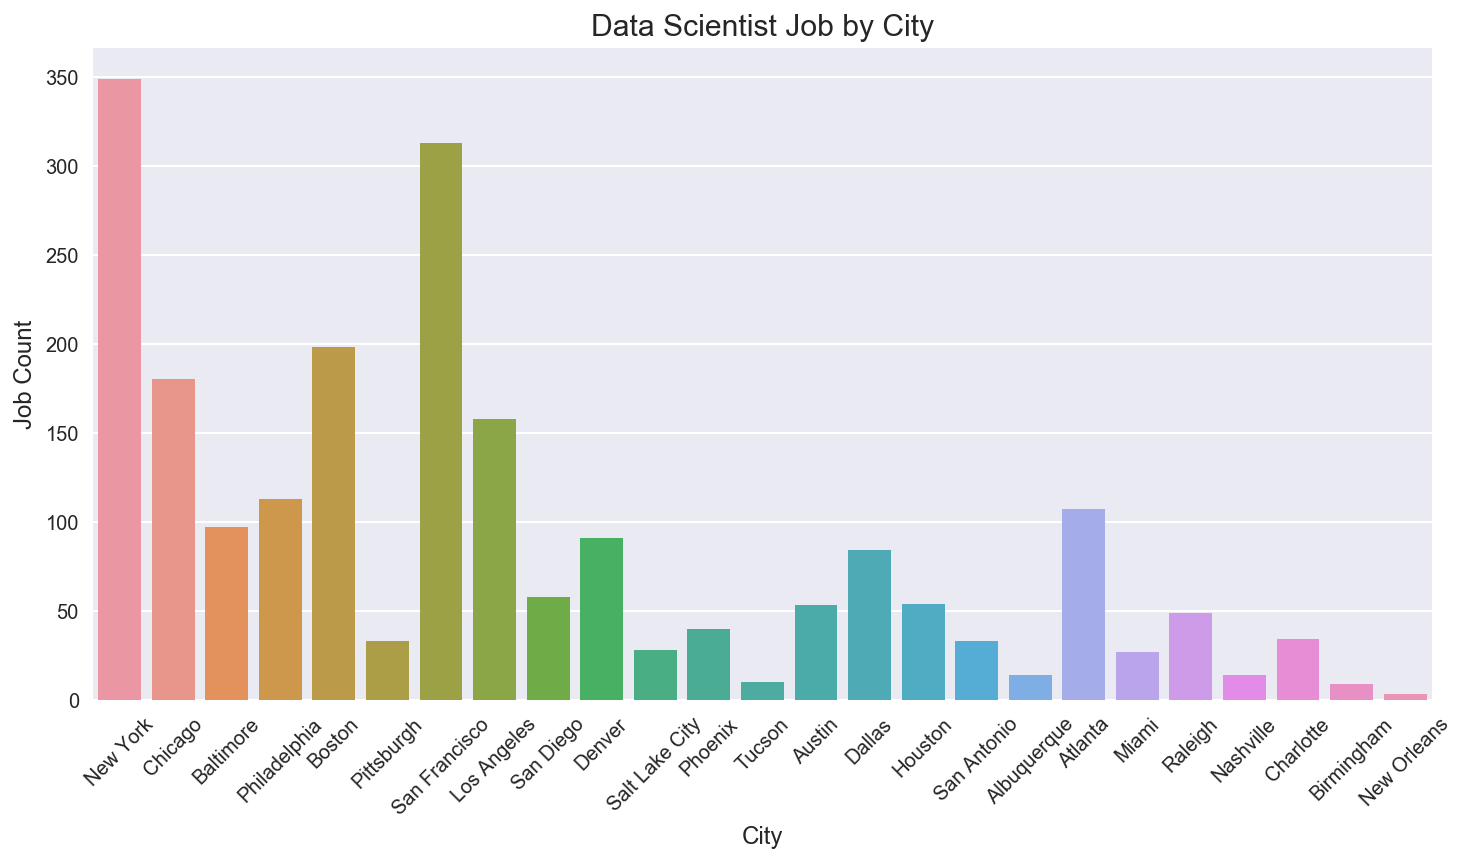

In [42]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'city', data = ds_jobs)
plt.ylabel('Job Count', fontsize = 12)
plt.xlabel('City', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Data Scientist Job by City', fontsize = 15)
plt.show()

#### The count plot shows New York, San Francisco, Chicago, Boston, Los Angeles, and Atlanta have plenty of Data Scientist Jobs.
#### Let's look at the job openings by regions

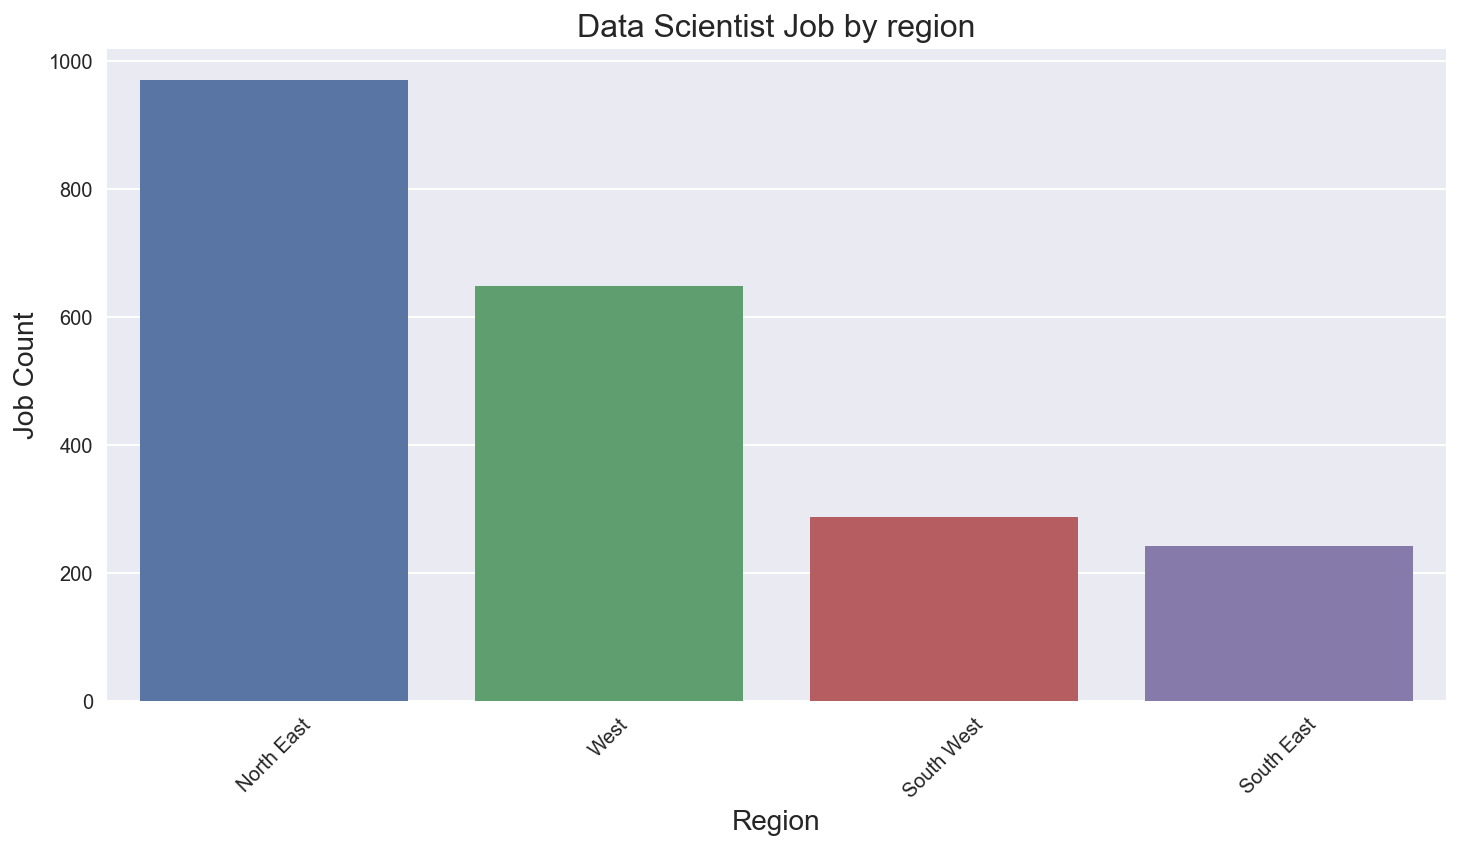

In [43]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'region', data = ds_jobs)
plt.ylabel('Job Count', fontsize = 14)
plt.xlabel('Region', fontsize = 14)
plt.xticks(rotation = 45)
plt.title('Data Scientist Job by region', fontsize = 16)
plt.show()

#### By region, North East is Data Scientist heaven, followed by the West. 

In [44]:
# I also want to know the jobposts that have salary information that I can
# get the feel of salary ranges of these jobs so that I can make a prediction
# on the jobs that do not have salary.
# I will subset a new dataframe called job_salary extracting all the job
# that has annual minimum wage greater than 0 and focus on it.


ds_job_salary = ds_jobs[ds_jobs['annual_min_salary'] > 0].reset_index()

In [45]:
ds_job_salary.head()

,index,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary
0,19,North East,New York,Sr Data Scientist,Fimo Info Solutions LLC,"SR Data Scientist, NYC*. The Data Scientist wi...",100000.0,120000.0
1,41,North East,New York,Data Scientist,MetroPlus Health Plan,The Data Scientist will be tasked with leading...,90000.0,115000.0
2,45,North East,New York,Climate and Sustainability Analyst,DEPT OF ENVIRONMENT PROTECTION,Knowledge and practical application of quantit...,59708.0,72246.0
3,46,North East,New York,Data Analyst,POLICE DEPARTMENT,"Extensive knowledge of applied statistics, ana...",70286.0,88213.0
4,72,North East,New York,Data Scientist,Enterprise Select,"Financial Services data such as transactions, ...",185000.0,NaN


In [46]:
ds_job_salary.columns

Index([u'index', u'region', u'city', u'jobtitle', u'company', u'job_desc',
       u'annual_min_salary', u'annual_max_salary'],
      dtype='object')

In [47]:
# I do not need column index anymore. remove it.

del ds_job_salary['index']

In [48]:
ds_job_salary.shape

# There are only 171 Data Scientist jobposts that have salary information

(190, 7)

In [49]:
ds_job_salary.sort_values(['annual_max_salary'], ascending=True).head()

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary
78,North East,Boston,Research Analyst,"Asset Recovery Advisors, Inc.",Data entry pertaining to ongoing research and ...,30000.0,35000.0
121,South West,Austin,Administrative Research Analyst (Police),City of Pflugerville,10.Skill in data analysis and problem solving....,32300.0,38280.0
45,North East,Baltimore,Health Law and Policy Research Analyst,"Intersect Healthcare, Inc.",Collect and interpret data and information fro...,30000.0,40000.0
120,South West,Tucson,"Research Specialist, (Data Analyst and Faculty...",University of Arizona,Creates and manages databases for studies whic...,31125.0,42843.0
110,West,Salt Lake City,Research Assistant/Analyst,University of Utah,The applicant will have experience in preparin...,24040.0,43260.0


In [51]:
ds_job_salary.annual_min_salary.median()

# The median annual salary for the lowest range column is eighty thousand. Not bad


87500.0

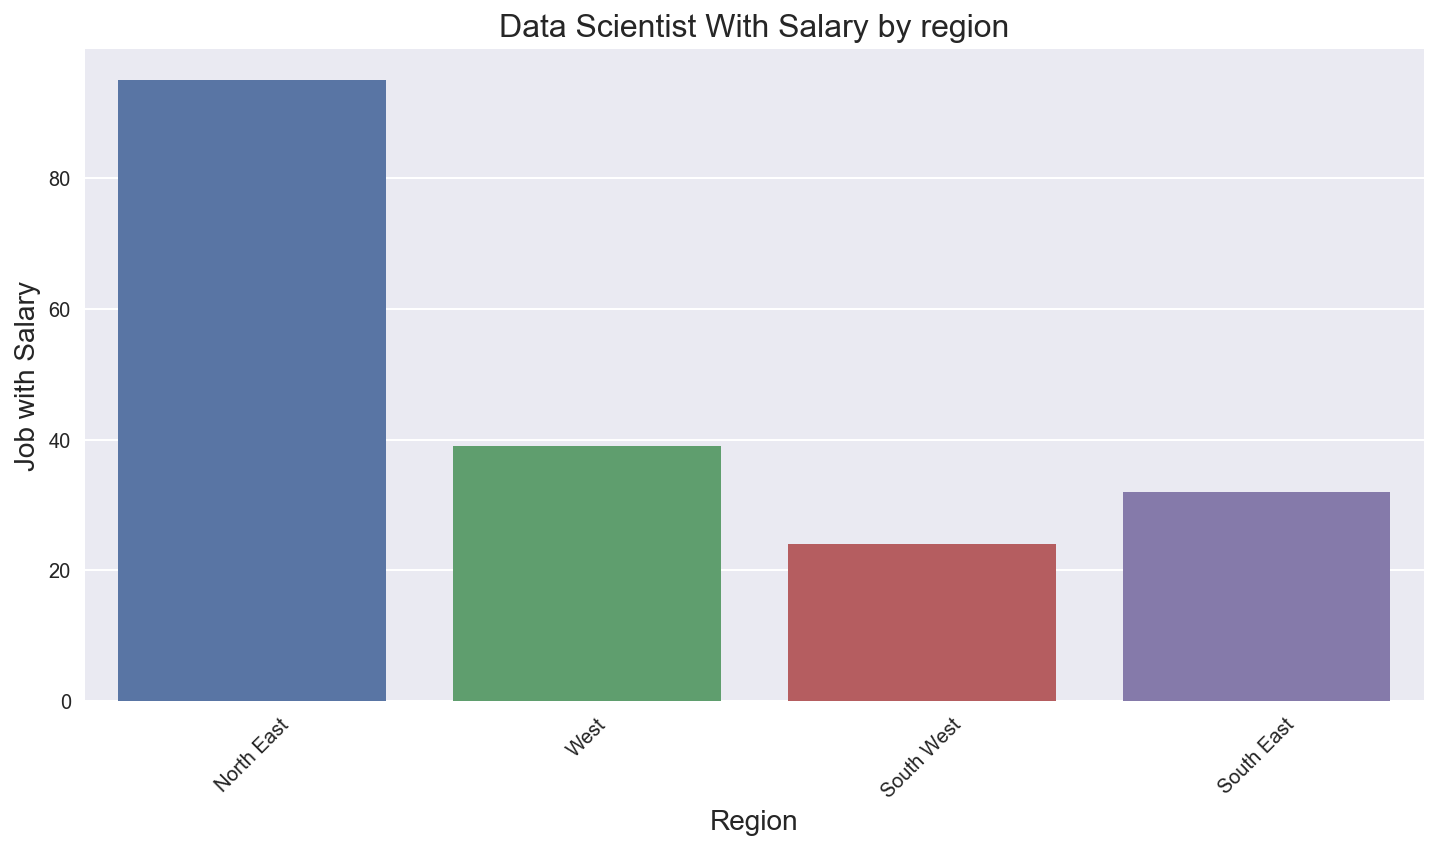

In [50]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'region', data = ds_job_salary)
plt.ylabel('Job with Salary', fontsize = 14)
plt.xlabel('Region', fontsize = 14)
plt.xticks(rotation = 45)
plt.title('Data Scientist With Salary by region', fontsize = 16)
plt.show()

#### Since some of the job posts do not have maximum salary or have only one salary, it is good to predict at least the minium salary and use maxium salary as a reference. 

In [52]:
ds_job_salary.describe()

# The average salary from the 190 Data Scientist/Analyst jobpost is $93,777.00

,annual_min_salary,annual_max_salary
count,190.000000,131.000000
mean,93777.468421,111973.000000
std,44760.014024,47917.222277
min,24040.000000,35000.000000
25%,59708.000000,74975.500000
50%,87500.000000,105663.000000
75%,120000.000000,140000.000000
max,300000.000000,300000.000000


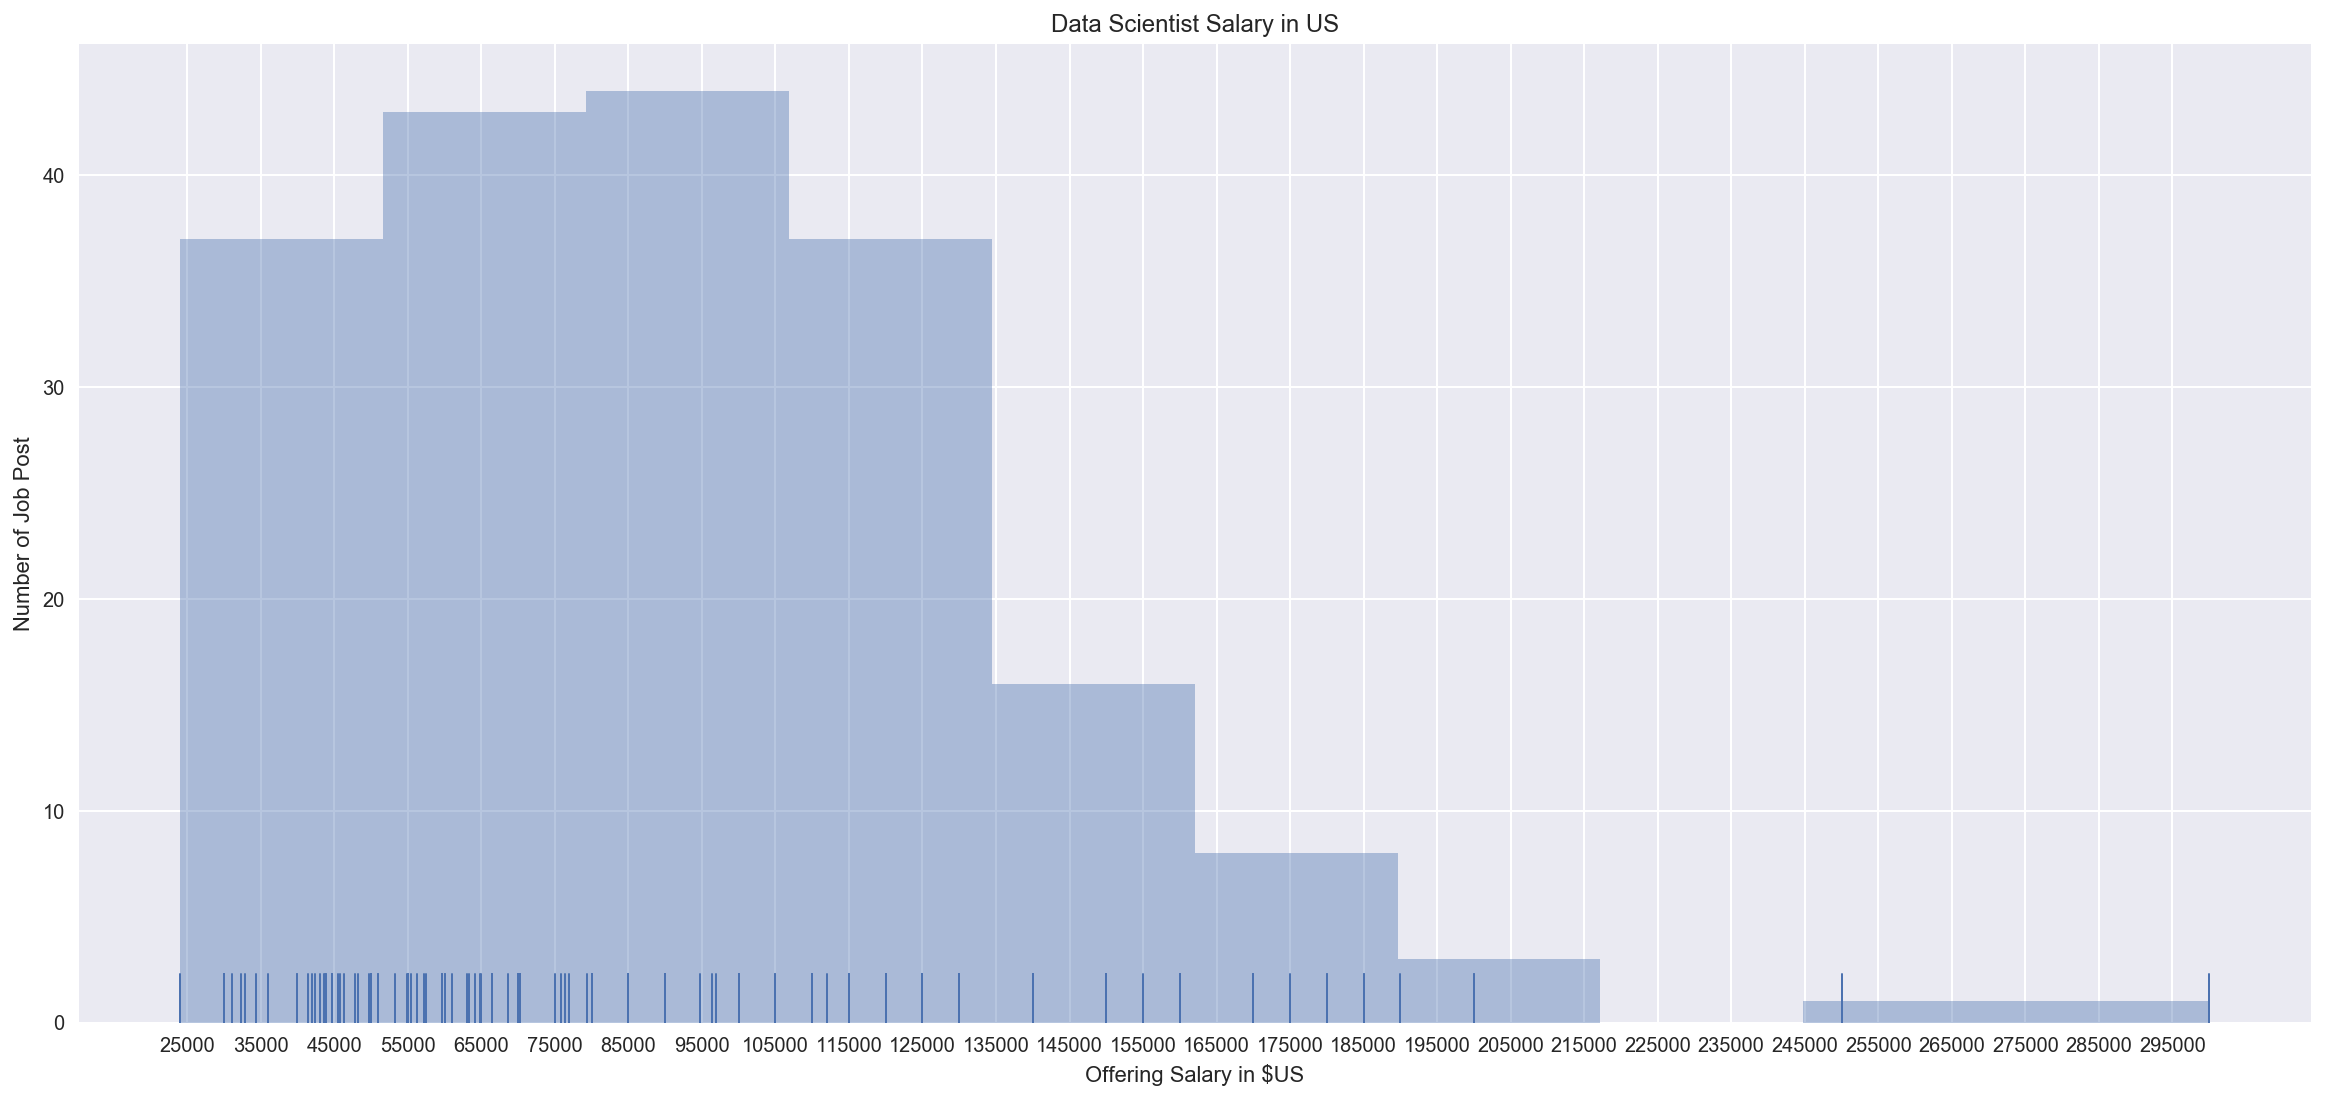

In [53]:
# Visualize the salary distribution.

fig, ax = plt.subplots(figsize = (20, 9))
sns.distplot(ds_job_salary.annual_min_salary, kde = False, rug = True, bins = 10)
ax.set(xlabel='Offering Salary in $US', 
       ylabel='Number of Job Post', 
       title = 'Data Scientist Salary in US',
      xticks = np.arange(25000, 300000, 10000))
plt.show()

# Majority of the annual salary aranges from $55,000 to 120,500. There are some outliners. 

In [54]:
# Now that I have the a better picture of salary, I divide the salary into three categories
# low, average, above average, and high

# Looking at the average salary statistics, I can split the salary this way:

# Salary =< 25 percentile is low = 0
# Salary between 26 to 50 percentile is average = 1
# Salary between 51 to 75 percentile is above average = 2
# Salary >=76 perentile is high = 3

ds_job_salary['salary_num_category'] = ds_job_salary.annual_min_salary.map(lambda x: 
                                                                  0 if x <= 59708
                                                                  else 1 if (x > 59708) & (x <= 87500)
                                                                  else 2 if (x > 87500) & (x <= 120000)   
                                                                  else 3)
ds_job_salary['salary_category'] = ds_job_salary.annual_min_salary.map(lambda x: 
                                                              'low' if x <= 59708
                                                               else 'average' if (x > 59708) & (x <= 87500)
                                                               else 'above average' if (x > 87500) & (x <= 120000)  
                                                               else 'high')


In [56]:
ds_job_salary.head()

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary,salary_num_category,salary_category
0,North East,New York,Sr Data Scientist,Fimo Info Solutions LLC,"SR Data Scientist, NYC*. The Data Scientist wi...",100000.0,120000.0,2,above average
1,North East,New York,Data Scientist,MetroPlus Health Plan,The Data Scientist will be tasked with leading...,90000.0,115000.0,2,above average
2,North East,New York,Climate and Sustainability Analyst,DEPT OF ENVIRONMENT PROTECTION,Knowledge and practical application of quantit...,59708.0,72246.0,0,low
3,North East,New York,Data Analyst,POLICE DEPARTMENT,"Extensive knowledge of applied statistics, ana...",70286.0,88213.0,1,average
4,North East,New York,Data Scientist,Enterprise Select,"Financial Services data such as transactions, ...",185000.0,NaN,3,high


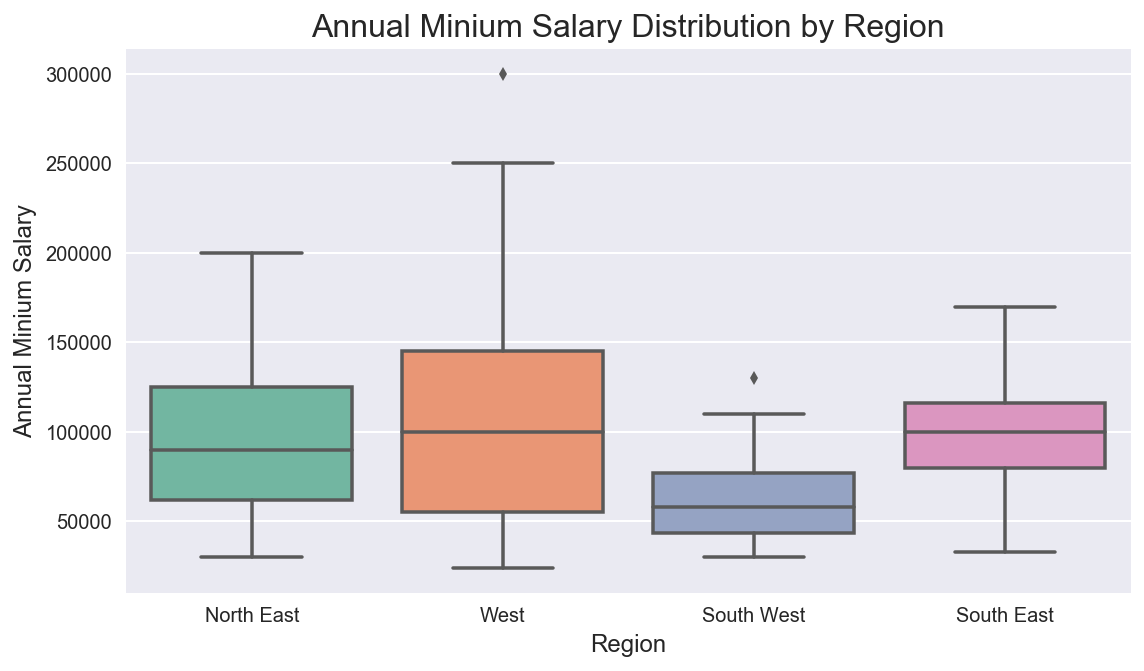

In [57]:
# Now let's look at the average salary offering by regions.

fig, ax = plt.subplots(figsize = (9, 5))

ax = sns.boxplot(x = 'region', y = 'annual_min_salary', data = ds_job_salary, palette = 'Set2')
ax.set_ylabel('Annual Minium Salary', fontsize = 12)
ax.set_xlabel('Region', fontsize = 12)
ax.set_title('Annual Minium Salary Distribution by Region', fontsize = 16)

# The West has a higher median offering salary, followed by the North East.
# However, with the cost of living adjustment, South East is not bad. 
# The two outliners are also in the North East and West regions.

#### The North East has a higher average offering salary, followed by the South East. Interesting. But there are only 171 observations, there may not been enough samples to represent these regions accurately. There are also 3 outliners ####


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

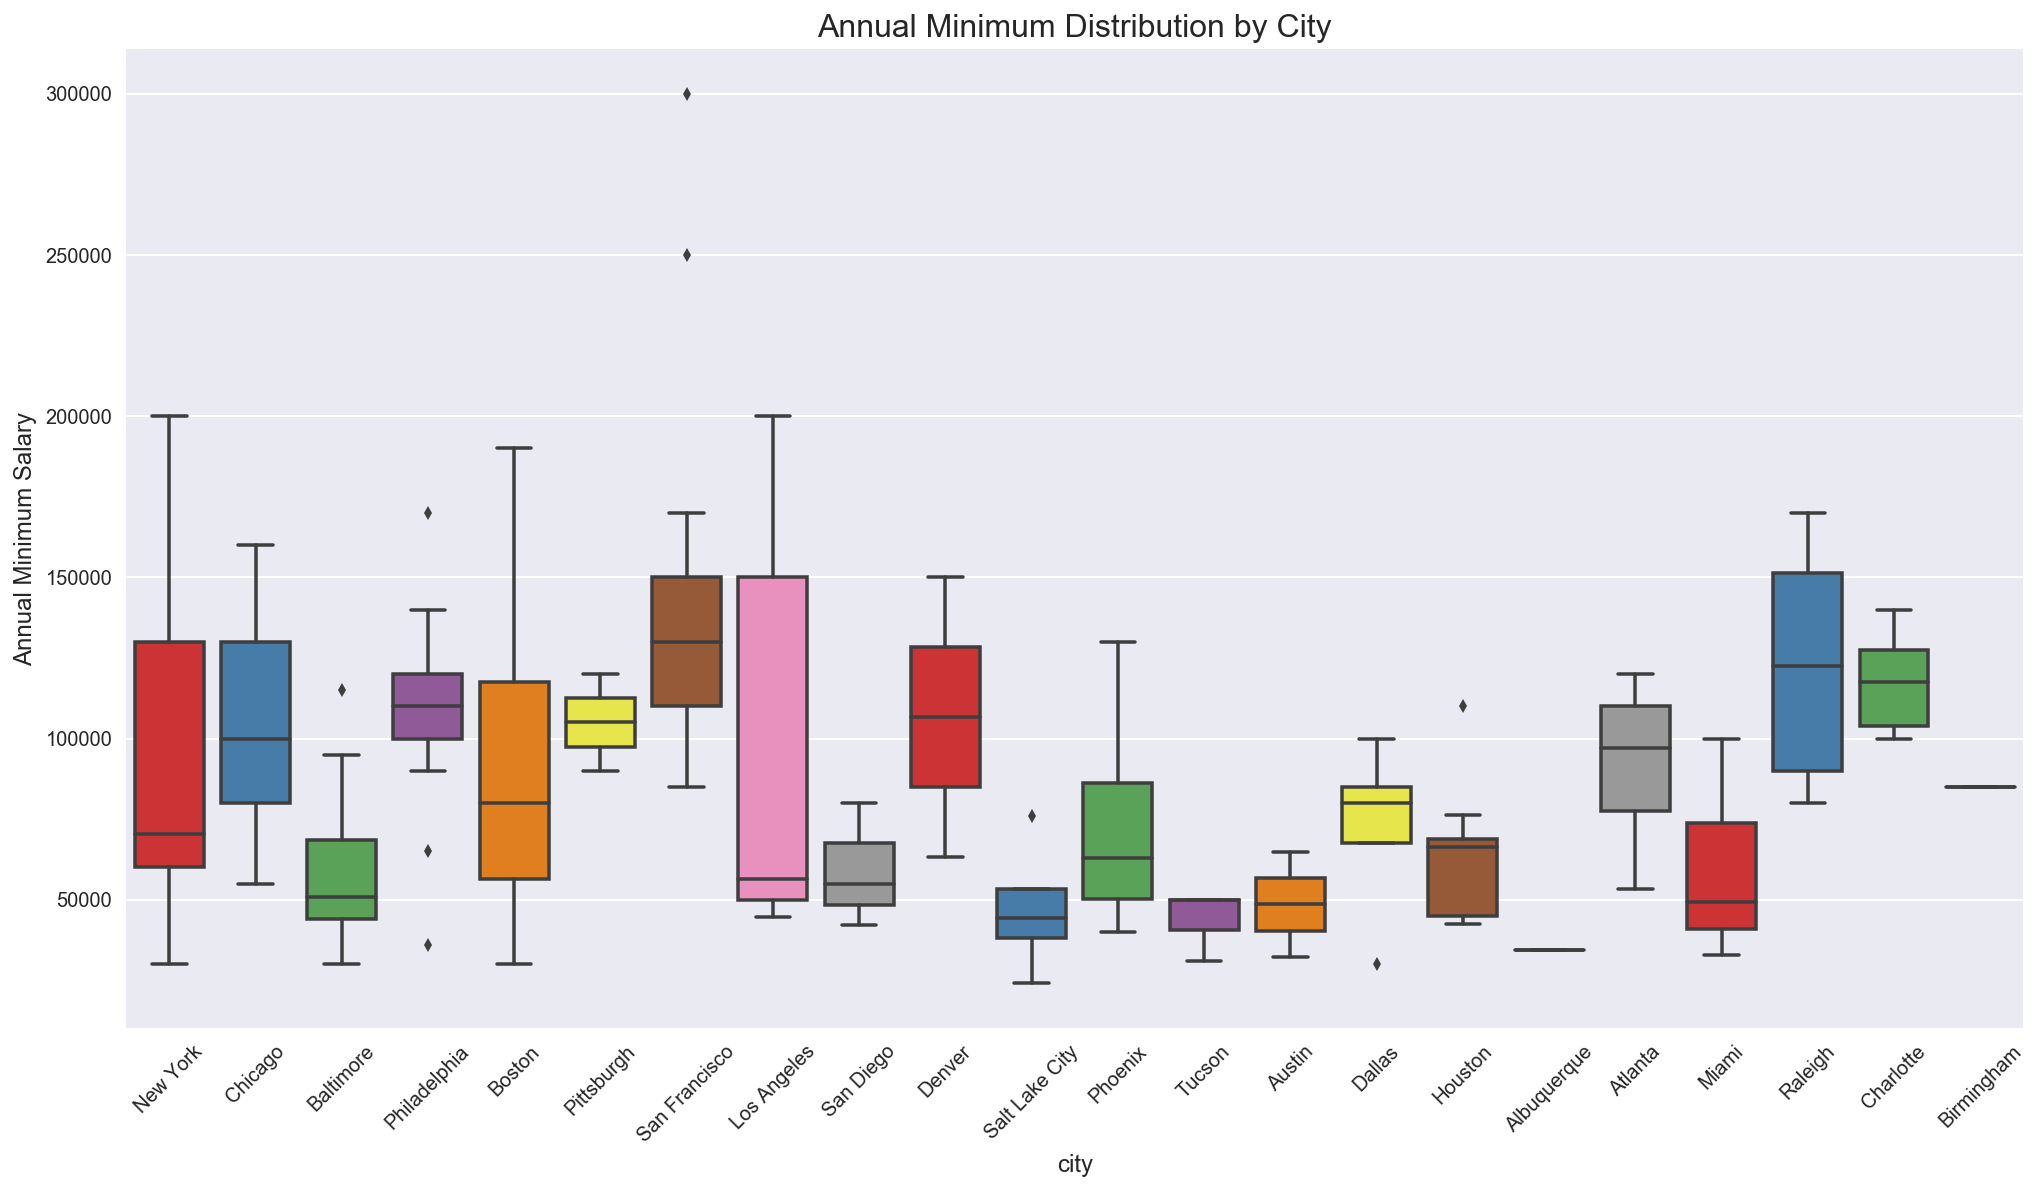

In [58]:
# Now let's look at the individual cities

fig, ax = plt.subplots(figsize = (17, 9))
ax = sns.boxplot(x = 'city', y = 'annual_min_salary', data = ds_job_salary, palette = 'Set1')
ax.set_ylabel('Annual Minimum Salary', fontsize = 12)
ax.set_xlabel('city', fontsize = 12)
ax.set_title('Annual Minimum Distribution by City', fontsize = 16)
plt.xticks(rotation = 45)

# San Francisco pay very well. But again, cost of living is also high in San Francisco. 
# Raleigh pays well too. 
# But I am going to stick with home, Atlanta. The median offering salary close to $90,000. Not bad.
# The jobs that have salary offering information is very small . In order
# to be more accurately predict the salary ranges, more samples need to gathered. 


#### San Francisco pay very well. But again, cost of living is also high in San Francisco. 
#### Raleigh pays well too. 
#### But I am going to stick with home, Atlanta. The median offering salary close to 90,000. Not bad.
#### The jobs that have salary offering information is very small . In order to be more accurately predict the salary ranges, more samples need to be gathered.
#### I also see the salary ranges varies a lot. This may due to some jobs such as analysts do not require machine learning skills. We need to find out more.


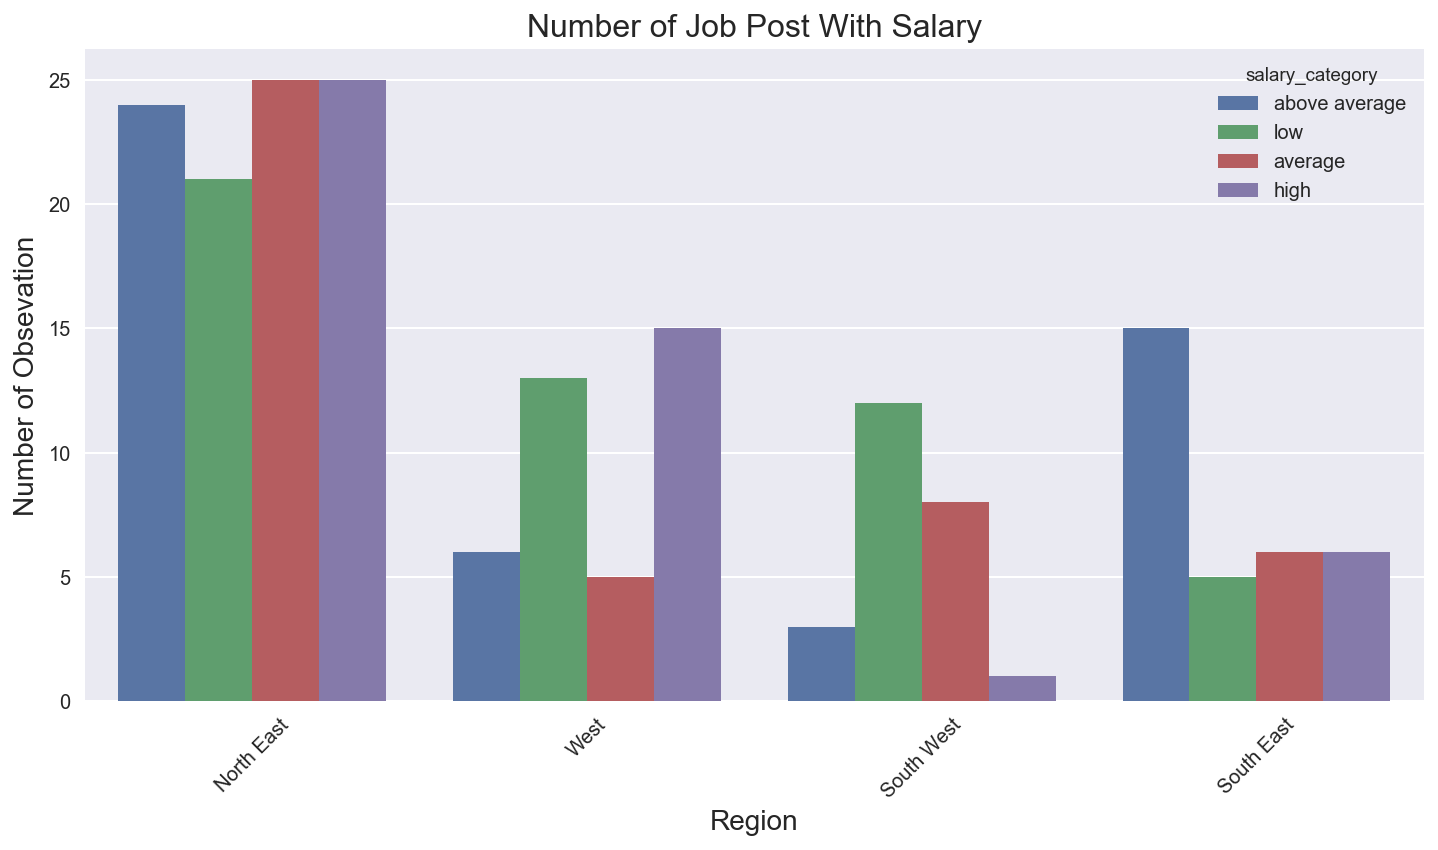

In [59]:
# Let's look at the salary categories by region

plt.figure(figsize=(12,6))
sns.countplot(x='region', data=ds_job_salary, hue = 'salary_category')
plt.ylabel('Number of Obsevation', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Number of Job Post With Salary", fontsize=16)
plt.xticks(rotation = 45)
plt.show()



#### North East propotionally have more data scientist & data analyst jobs than the rest of the regions. 
#### West have more high salary jobs. South East have more above average jobs. Since cost of living in the West is quite high, after adjusted cost of living, South East data science job market is quite an attractive.

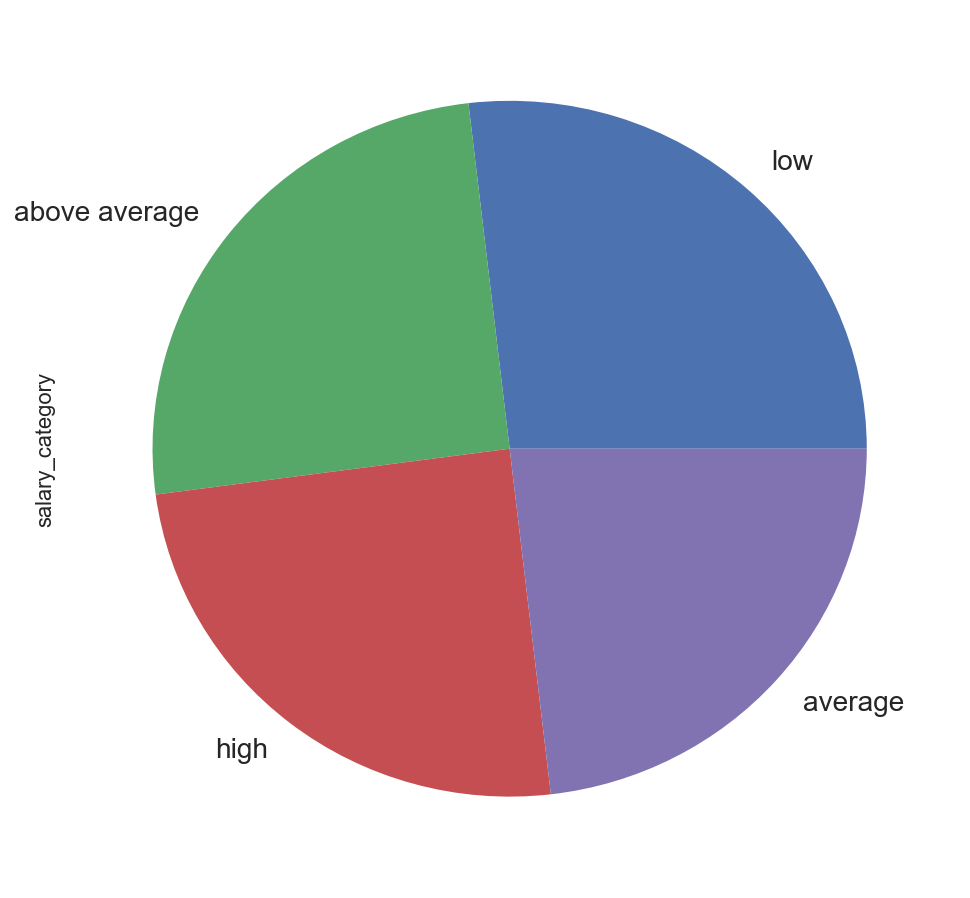

In [60]:
plt.figure(figsize=(8,8))
ds_job_salary.salary_category.value_counts().plot(kind = 'pie', fontsize = 14)
plt.title = 'Salary Category'

#### Now that I have a good sense of the salary ranges and what consider as low and high salary. It is time to find out what features contribute to low salary and what skills can grab the high salary post. 



In [61]:
# Convert the cities into dummy variables
ds_job_salary_city_dummy = pd.get_dummies(ds_job_salary['city'], prefix = 'city', drop_first=True)

ds_job_salary = pd.concat([ds_job_salary, ds_job_salary_city_dummy], axis = 1)

In [62]:
ds_job_salary.head()

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary,salary_num_category,salary_category,city_Atlanta,...,city_Miami,city_New York,city_Philadelphia,city_Phoenix,city_Pittsburgh,city_Raleigh,city_Salt Lake City,city_San Diego,city_San Francisco,city_Tucson
0,North East,New York,Sr Data Scientist,Fimo Info Solutions LLC,"SR Data Scientist, NYC*. The Data Scientist wi...",100000.0,120000.0,2,above average,0,...,0,1,0,0,0,0,0,0,0,0
1,North East,New York,Data Scientist,MetroPlus Health Plan,The Data Scientist will be tasked with leading...,90000.0,115000.0,2,above average,0,...,0,1,0,0,0,0,0,0,0,0
2,North East,New York,Climate and Sustainability Analyst,DEPT OF ENVIRONMENT PROTECTION,Knowledge and practical application of quantit...,59708.0,72246.0,0,low,0,...,0,1,0,0,0,0,0,0,0,0
3,North East,New York,Data Analyst,POLICE DEPARTMENT,"Extensive knowledge of applied statistics, ana...",70286.0,88213.0,1,average,0,...,0,1,0,0,0,0,0,0,0,0
4,North East,New York,Data Scientist,Enterprise Select,"Financial Services data such as transactions, ...",185000.0,NaN,3,high,0,...,0,1,0,0,0,0,0,0,0,0


In [63]:
# Let's define features for training and the prediction of salary range categories. 

# First, let's use location/city variable as a predictor

select_feature = [c for c in ds_job_salary.columns if 'city_' in c]
X = ds_job_salary[select_feature]

y = ds_job_salary.salary_num_category



In [64]:
print X.shape
print y.shape

(190, 21)
(190,)


In [65]:
# Calculate base accuracy

base_accuracy = y.value_counts()/len(y)
base_accuracy

# Looks like there are about 25% of predicting each salary catetory

0    0.268421
2    0.252632
3    0.247368
1    0.231579
Name: salary_num_category, dtype: float64

In [66]:
# Since this is a classification problem, we can use a few categorical models. Let's use randomforest first.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics


### Use Random Forest as a model

In [67]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Instantiate the Randomforest model with 3000 trees
rf = RandomForestClassifier(n_estimators=3000)

# Fit/train the the data
rf.fit(X_train, y_train)

# Make prediction
rf_y_pred_class = rf.predict(X_test)


# Check DecisionTree accuracy


print 'Random Forest Prediction Accuracy Score: ', metrics.accuracy_score(y_test, rf_y_pred_class)



Random Forest Prediction Accuracy Score:  0.458333333333


### The base accuracy is around 0.25. The  Random Forest Decision Tree ranges from accuracy score of 0.33 to 0.5. Not bad.

In [68]:
# Check how well my prediction is using confusion matrix

confusion = metrics.confusion_matrix(y_test, rf_y_pred_class)

confu_matrix = pd.DataFrame(confusion, index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3'],
                           columns = ['Predicted: 0', 'Predicted: 1', 'Predicted: 2', 'Predicted: 3'])
confu_matrix

,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 0,6,4,0,0
Actual: 1,3,3,2,2
Actual: 2,1,1,6,4
Actual: 3,0,5,4,7


### Random Forest Prediction Confusion Matrix:
#### There are total of :
 * 10 low salary, 6 are correctly predicted(about 60%)
 * 10 average salary, 3 are correctly predicted(about 30%)
 * 12 above average salary, 6 are correctly predicted(about 50%)
 * 16 high salary, 7 are correctly predicted (about 44%)
 
 #### Random Forst does not do well on average & high salary predictions. In average, the prediction accuracy is 46%.


In [69]:
# Extract feature (city)

rf.feature_importances_

array([ 0.06229156,  0.01426478,  0.04886302,  0.01932919,  0.03494722,
        0.04404383,  0.06243256,  0.01927261,  0.02857134,  0.03117443,
        0.06640631,  0.02262241,  0.06542859,  0.16768094,  0.02640065,
        0.04287011,  0.05056979,  0.02578804,  0.02526414,  0.11297165,
        0.02880684])

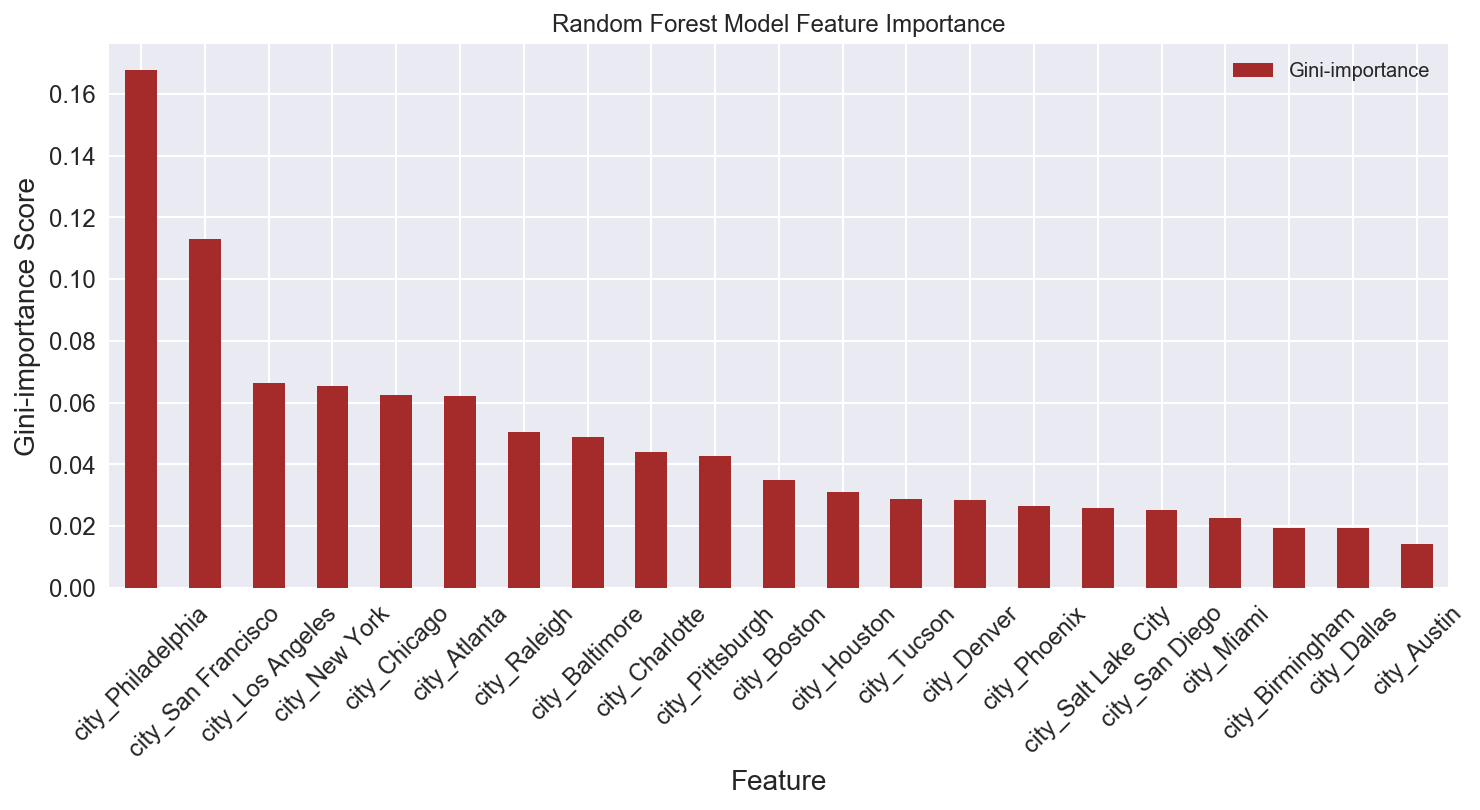

In [72]:
rf_feats= {}
for feature, importance in zip(select_feature, rf.feature_importances_):
    rf_feats[feature] = importance
    
rf_feat_importances = pd.DataFrame.from_dict(rf_feats, orient='index').rename(columns={0:'Gini-importance'})
rf_feat_importances.sort_values(by='Gini-importance', ascending=False).plot(kind = 'bar', 
                                                                            rot=45, 
                                                                            figsize = (12,5), 
                                                                            fontsize = 12, 
                                                                            color = '#A52A2A',
                                                                           title = 'Random Forest Model Feature Importance')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)

#### Random Forst shows Philadelphia is the most important city determining the offering salary, followed by San Francisco, Los Angles, New York, and Chicago. Ummm, this is interesting. 

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
import six
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rf.estimators_:
    if (i_tree <1):
        export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree' + str(i_tree) + '.png')
        i_tree = i_tree + 1


In [ ]:
# Let's make a chart

# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()  

# export_graphviz(rf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)  

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png()) 

### Let's Try Logistic Regression as a model

In [73]:
# Let's try logistic regression to find out if this model will provide better accuracy score

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
# Make predictions
lr_y_pred_class = logreg.predict(X_test)

print 'Logistic Regression Accuracy Score: ', metrics.accuracy_score(y_test, lr_y_pred_class)

Logistic Regression Accuracy Score:  0.4375


In [75]:
# Look at the probability 

print 'The intercept of the Logistic Regression modeling is: \t', logreg.intercept_
print 'The coefficients of the Logistic Regression modeling is: \t', logreg.coef_

The intercept of the Logistic Regression modeling is: 	[-0.74947521 -1.17157483 -1.03510404 -1.45806459]
The coefficients of the Logistic Regression modeling is: 	[[-0.62069394  0.5497704   0.81214207 -0.26591656 -0.52700518 -0.61199546
  -0.90036924  0.24637779 -0.459686    0.29008226  0.81214207  0.37251734
  -0.37875279 -0.84944229  0.44831497 -0.459686   -0.73750373  0.6068112
   0.6068112  -1.27884522  0.91662224]
 [ 0.04364516 -0.20199718  0.05038902  0.63168679  0.55148618 -0.48192759
   0.38146612  0.37742454  0.37742454  0.55148618 -0.65857172  0.03107723
   0.67525017 -1.06330713 -0.20721323 -0.35654572 -0.58759537  0.18513664
   0.18513664 -1.06330713 -0.35654572]
 [ 1.02338469 -0.22155823 -0.3679563  -0.22155823  0.06957923  0.72831078
  -0.41625338 -0.38827919 -0.38827919 -0.37430956 -1.18038847 -0.02737392
  -1.17485733  2.0109061  -0.27492445  1.01168711  0.51173829 -0.52212894
  -0.52212894  0.33944818 -0.38827919]
 [-0.77475987 -0.16477426 -0.97144282 -0.16477426 -0.15

In [76]:
# Check prediction results from confusion matrix

lr_confusion = metrics.confusion_matrix(y_test, lr_y_pred_class)

lr_confu_matrix = pd.DataFrame(lr_confusion, index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3'],
                           columns = ['Predicted: 0', 'Predicted: 1', 'Predicted: 2', 'Predicted: 3'])
lr_confu_matrix

,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 0,6,4,0,0
Actual: 1,3,3,3,1
Actual: 2,1,1,7,3
Actual: 3,0,5,6,5


### Logistic Regression Prediction Confusion Matrix:
#### There are total of :
 * 10 low salary, 6 are correctly predicted(about 60%)
 * 10 average salary, 3 are correctly predicted(about 30%)
 * 12 above average salary, 7 are correctly predicted(about 58%)
 * 16 high salary, 5 are correctly predicted (about 31%)
 
 #### Logistic Regression did not do better than  Random Forest Classifier. In average, the accuracy is only 44%

#### The small observations may also cause the low prediction accuracy. This suggests more salary observations need to be obtained to make a better predictions. 

### I believe job title and job description somewhat determine salary. Next, I will use Natural Language Processing to analyze job title apply the random forest classifier and logistic regression modeling to make prediction again. 

### Let's try using Natural Language Processing (NLP) to make salary predictions.



In [77]:
# Import CountVectorizer to count the frequency of words from job title. 

from sklearn.feature_extraction.text import CountVectorizer


In [78]:
ds_job_salary.head(2)

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary,salary_num_category,salary_category,city_Atlanta,...,city_Miami,city_New York,city_Philadelphia,city_Phoenix,city_Pittsburgh,city_Raleigh,city_Salt Lake City,city_San Diego,city_San Francisco,city_Tucson
0,North East,New York,Sr Data Scientist,Fimo Info Solutions LLC,"SR Data Scientist, NYC*. The Data Scientist wi...",100000.0,120000.0,2,above average,0,...,0,1,0,0,0,0,0,0,0,0
1,North East,New York,Data Scientist,MetroPlus Health Plan,The Data Scientist will be tasked with leading...,90000.0,115000.0,2,above average,0,...,0,1,0,0,0,0,0,0,0,0


In [100]:
# define predictors (jobtitle & job_desc) and target (salary categories)


X_nlp = ds_job_salary.jobtitle.values

y = ds_job_salary.salary_num_category.values


In [101]:
print X_nlp.shape
print y.shape


(190,)
(190,)


In [102]:
# Split the NLP training and test set into 75/25

from sklearn.model_selection import train_test_split

X_nlp_train, X_nlp_test, y_train, y_test = train_test_split(X_nlp, y, test_size = 0.25)

In [103]:
# Transform the training job title
# I set ngram = 1 because I believe some words such as scientist, python, sql, etc have good impact to salary.
# I also exclude some stop words such as 'to', 'I', 'then' etc that are not important. 

vect = CountVectorizer(stop_words='english', ngram_range=(1,1), max_features=5000)
vect.fit(X_nlp_train)
X_nlp_train_dtm = vect.transform(X_nlp_train)

In [104]:
# Take a peek if the bag of words counted successfully

pd.DataFrame(X_nlp_train_dtm.toarray(), columns = vect.get_feature_names()).head().transpose()

# This looks good. There are 131 words in the jobtitle 

,0,1,2,3,4
225k,0,0,0,0,0
9733br,0,0,0,0,0
account,0,0,0,0,0
admin,0,0,0,0,0
administrative,0,0,0,0,0
ai,0,0,0,0,0
analyst,0,1,1,0,1
analytics,0,0,0,0,0
assessment,0,0,0,0,0
assistant,0,0,0,0,0


In [112]:
# Use randomforest to fit/train the job title 

rf_nlp = RandomForestClassifier(n_estimators=3000)

rf_nlp.fit(X_nlp_train_dtm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [113]:
X_nlp_test_dtm = vect.transform(X_nlp_test)
X_nlp_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [114]:
# Transform the test set of job title

pd.DataFrame(X_nlp_test_dtm.toarray(), columns= vect.get_feature_names()).head().transpose()

,0,1,2,3,4
225k,0,0,0,0,0
9733br,0,0,0,0,0
account,0,0,0,0,0
admin,0,0,0,0,0
administrative,0,0,0,0,0
ai,0,0,0,0,0
analyst,1,0,0,1,1
analytics,0,1,0,0,0
assessment,0,0,0,0,0
assistant,0,0,0,0,0


In [115]:
# Make prediction
rf_nlp_pred_class = rf_nlp.predict(X_nlp_test_dtm)

In [116]:
# Check the accuracy score
rf_nlp_score = metrics.accuracy_score(y_test, rf_nlp_pred_class)
rf_nlp_score

0.54166666666666663

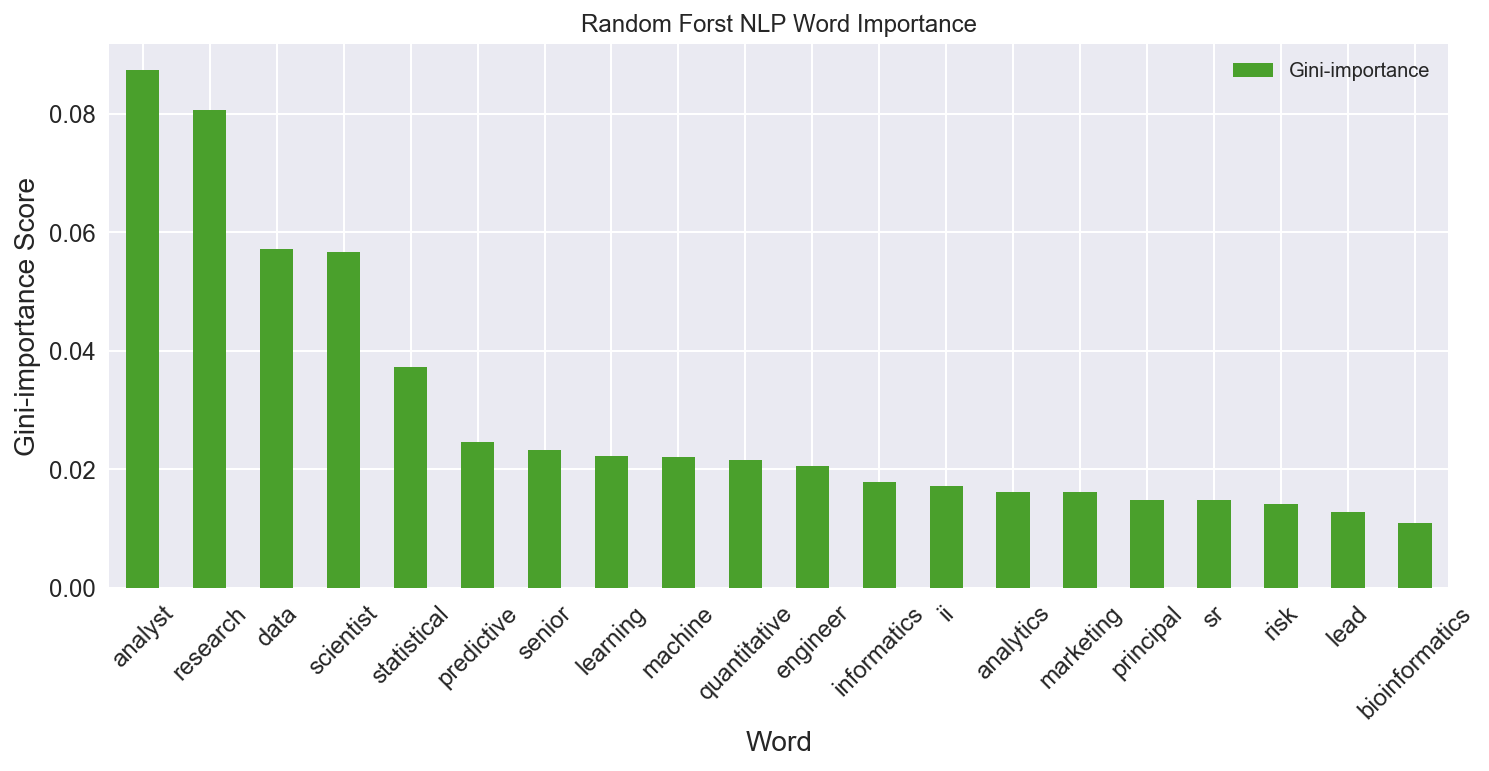

In [152]:
rf_title_feats= {}
for feature, importance in zip(vect.get_feature_names(), rf_nlp.feature_importances_):
    rf_title_feats[feature] = importance
    
rf_nlp_feat_importances = pd.DataFrame.from_dict(rf_title_feats, orient='index').rename(columns={0:'Gini-importance'})
rf_nlp_feat_importances.sort_values(by='Gini-importance', ascending = False).head(20).plot(kind = 'bar', 
                                                                            rot = 45,               
                                                                            figsize = (12,5), 
                                                                            fontsize = 12, 
                                                                            color = '#4AA02C',
                                                                           title = 'Random Forst NLP Word Importance')
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)



#### Using the job title to make prediction with RandomForest, the accuracy is 54%. Some improvement. 
#### The feature importances show analyst, research, statistical, predictive, senior, machine learning, quantitative, and engineer have good impact on salary offerings. 

In [162]:
# Check the job title for high salary category.

ds_job_salary[ds_job_salary['salary_category'] == 'high'].head(10)

# Ah, jot title with Data Sciencist, predictive, machine learning all pay very well. 
# So what about job title with word 'Analyst' and 'Research'?

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary,salary_num_category,salary_category,city_Atlanta,...,city_Miami,city_New York,city_Philadelphia,city_Phoenix,city_Pittsburgh,city_Raleigh,city_Salt Lake City,city_San Diego,city_San Francisco,city_Tucson
4,North East,New York,Data Scientist,Enterprise Select,"Financial Services data such as transactions, ...",185000.0,NaN,3,high,0,...,0,1,0,0,0,0,0,0,0,0
5,North East,New York,Predictive Analytics (Machine Learning),"Kennedy Unlimited Inc, Professional Staffing",Salary 130K to 140K We are assisting our Clien...,130000.0,140000.0,3,high,0,...,0,1,0,0,0,0,0,0,0,0
8,North East,New York,"VP, Data Science ( FinTech / Python / R / Mach...",Venturi Ltd,"Lead Data Scientist, FinTech, Python, R, Machi...",200000.0,300000.0,3,high,0,...,0,1,0,0,0,0,0,0,0,0
13,North East,New York,Data Scientist,Oliver James Associates,Perform Data Analysis and data manipulation on...,180000.0,NaN,3,high,0,...,0,1,0,0,0,0,0,0,0,0
16,North East,New York,Data Scientist,Averity,"Our team is made up of five data scientists, a...",125000.0,140000.0,3,high,0,...,0,1,0,0,0,0,0,0,0,0
17,North East,New York,Data Scientist - Online Media,Harnham,"Data Scientist - Online Media. Data Scientist,...",150000.0,NaN,3,high,0,...,0,1,0,0,0,0,0,0,0,0
21,North East,New York,"VP, Data Scientist - Banking",Harnham,"VP, Data Scientist - Banking. Data Scientist |...",180000.0,NaN,3,high,0,...,0,1,0,0,0,0,0,0,0,0
22,North East,New York,Sr. Modeling Data Scientist,S.C. International,Large insurance organization is seeking talent...,130000.0,NaN,3,high,0,...,0,1,0,0,0,0,0,0,0,0
25,North East,New York,Principal NLP Data Scientist ($225k+),Averity,Are you interested in a Principal or VP-level ...,175000.0,225000.0,3,high,0,...,0,1,0,0,0,0,0,0,0,0
26,North East,Chicago,Data Scientist – Marketing Analytics,Enterprise Select,We are currently looking for an experienced Da...,125000.0,NaN,3,high,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
ds_job_salary[ds_job_salary['salary_category'] == 'low'].head(10)

# Ah, job title with "Analyst' and 'Research' do not pay much. 

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary,salary_num_category,salary_category,city_Atlanta,...,city_Miami,city_New York,city_Philadelphia,city_Phoenix,city_Pittsburgh,city_Raleigh,city_Salt Lake City,city_San Diego,city_San Francisco,city_Tucson
2,North East,New York,Climate and Sustainability Analyst,DEPT OF ENVIRONMENT PROTECTION,Knowledge and practical application of quantit...,59708.0,72246.0,0,low,0,...,0,1,0,0,0,0,0,0,0,0
9,North East,New York,Research Analyst,Paradigm Investigations,Collecting documents and information about cus...,50000.0,NaN,0,low,0,...,0,1,0,0,0,0,0,0,0,0
14,North East,New York,"Environmental Analyst, Bureau of Environmental...",DEPT OF HEALTH/MENTAL HYGIENE,Completing data checks and documentation for r...,59708.0,65678.0,0,low,0,...,0,1,0,0,0,0,0,0,0,0
20,North East,New York,Bioinformatics Analyst,"Envisagenics, Inc.",To work with Envisagenics data engineers and b...,50000.0,70000.0,0,low,0,...,0,1,0,0,0,0,0,0,0,0
24,North East,New York,"Panel Maintenance Analyst, World Trade Center ...",DEPT OF HEALTH/MENTAL HYGIENE,"-Assisting in survey intake, data capture proc...",59708.0,72246.0,0,low,0,...,0,1,0,0,0,0,0,0,0,0
28,North East,Chicago,Research Analyst,Illinois Criminal Justice Information Authority,Produce analyses of crime trends and provide d...,55000.0,60000.0,0,low,0,...,0,0,0,0,0,0,0,0,0,0
29,North East,Chicago,Research Analyst,ICJIA,(3) analyzing qualitative and quantitative dat...,55000.0,60000.0,0,low,0,...,0,0,0,0,0,0,0,0,0,0
43,North East,Baltimore,Research Data Analyst,Johns Hopkins University,Collect additional clinical data and chart abs...,43871.0,60402.0,0,low,0,...,0,0,0,0,0,0,0,0,0,0
45,North East,Baltimore,Health Law and Policy Research Analyst,"Intersect Healthcare, Inc.",Collect and interpret data and information fro...,30000.0,40000.0,0,low,0,...,0,0,0,0,0,0,0,0,0,0
47,North East,Baltimore,Sr. Research Data Analyst,Johns Hopkins University,Carry out data analyses in parallel on large c...,50956.0,70095.0,0,low,0,...,0,0,0,0,0,0,0,0,0,0


### Let's use Logistic Regression to train the machine on salary prediction using job titles

In [128]:
# How about comparing to Logistic Regression
logreg_nlp = LogisticRegression()
logreg_nlp.fit(X_nlp_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
lr_nlp_pred_class = logreg_nlp.predict(X_nlp_test_dtm)

In [130]:
lr_nlp_score = metrics.accuracy_score(y_test, lr_nlp_pred_class)
lr_nlp_score

0.5625

#### Logistic Regression seems to be better. The accuracy score is 56%, higher than Random Forest

In [131]:
# Calcuate predicted probablitiy for average salary 
lr_nlp_pred_prob = logreg_nlp.predict_proba(X_nlp_test_dtm)[:,1]
lr_nlp_pred_prob

array([ 0.44224133,  0.10523538,  0.24862587,  0.0905088 ,  0.34114991,
        0.4072662 ,  0.36428161,  0.28561294,  0.24862587,  0.21423644,
        0.24862587,  0.24862587,  0.23115973,  0.21746565,  0.24862587,
        0.3442986 ,  0.13652618,  0.14511983,  0.24862587,  0.63656961,
        0.1630669 ,  0.24862587,  0.14511983,  0.19550504,  0.2348431 ,
        0.16416581,  0.16859185,  0.12457643,  0.1611244 ,  0.23586347,
        0.50800165,  0.30170016,  0.18258152,  0.16580693,  0.10171595,
        0.31719709,  0.20212166,  0.23115973,  0.33469771,  0.14511983,
        0.24862587,  0.16730663,  0.24862587,  0.14511983,  0.24862587,
        0.14511983,  0.14511983,  0.42811084])

### Let's try Multinomial Naive Base because Naive Base is very effective on NLP

In [133]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [134]:
nb.fit(X_nlp_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [135]:
nb_y_pred_class = nb.predict(X_nlp_test_dtm)

In [136]:
metrics.accuracy_score(y_test, nb_y_pred_class)

0.58333333333333337

#### Naive Bayes perform better than RandomForest & Logistic Regression, it has 58% accuracy.

## Conclusion:

#### North East and West coast have plenty of Data Science jobs, followed by South East. This is good news. 
#### Both West coast and South East average salary for Data Scientist jobs is close to 6 figures. But cost of living in the West is much higher. South East should be a good place to look for Data Scientist job. 

#### Using Naive Bayes Classifier and job title to predict salary range perform better than Random Forest and Logistics regression models. Form the gathered samples, Job title contains 'Analyst', 'Research', However, the job posts that have salary information is small, that may have the effect on the overall prediction accuracy. In order to imporve the salary accuracy, more job posts with salary information is required. 
    